In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
import pandas as pd

In [12]:
df_p =pd.read_csv(r"C:\Users\asifk\Desktop\Data Analytics\DA\Python\Regression\AirBNB.csv")

C:\Users\asifk\AppData\Local\Temp\ipykernel_45380\3084557631.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_p =pd.read_csv(r"C:\Users\asifk\Desktop\Data Analytics\DA\Python\Regression\AirBNB.csv")


In [14]:
df_p

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [18]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


## Deleting the Un-necessary columns 

In [25]:
df_air = df_p.copy()

In [27]:
df_air

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


## we need to drop "id" column as model may consider this as number which will not involved in predicting the price 

In [31]:
df_air.drop("id",axis=1,inplace=True)

In [33]:
df_air

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [37]:
df_air.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
74106     True
74107    False
74108    False
74109    False
74110    False
Length: 74111, dtype: bool

In [39]:
df_air.duplicated().sum()

19994

In [43]:
df_air.drop_duplicates(inplace=True)

In [45]:
df_air

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74104,Entire home/apt,2.0,1.0,strict,True,f,100.0,1.0,1.0,4.356709
74107,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [47]:
for i in df_air.columns: 
    print(df_air[i].value_counts())
    print()

room_type
Entire home/apt    33854
Private room       18413
Shared room         1845
Name: count, dtype: int64

accommodates
2.0     18707
4.0     10208
3.0      6692
1.0      5976
6.0      4757
5.0      3264
8.0      1782
7.0       933
10.0      696
16.0      297
9.0       268
12.0      262
14.0      104
11.0       79
15.0       54
13.0       35
Name: count, dtype: int64

bathrooms
1.0    39137
2.0     7313
1.5     3496
2.5     1517
3.0     1050
3.5      425
4.0      276
0.5      202
0.0      192
4.5      115
5.0       72
5.5       39
8.0       36
6.0       24
6.5       12
7.0       10
7.5        6
Name: count, dtype: int64

cancellation_policy
strict      25213
flexible    14569
moderate    14327
Name: count, dtype: int64

cleaning_fee
True     40348
False    13765
Name: count, dtype: int64

instant_bookable
f    37838
t    16279
Name: count, dtype: int64

review_scores_rating
100.0    9794
98.0     3265
96.0     3156
97.0     3149
95.0     2940
93.0     2937
90.0     2382
94.0     2

In [50]:
df_air.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,54114.0,3.525982,2.343854,1.0,2.000000,3.000000,4.000000,16.000000
bathrooms,53922.0,1.304829,0.651167,0.0,1.000000,1.000000,1.500000,8.000000
review_scores_rating,43902.0,93.202041,8.382243,20.0,90.000000,95.000000,99.000000,100.000000
bedrooms,54025.0,1.363258,0.951493,0.0,1.000000,1.000000,2.000000,10.000000
beds,53992.0,1.917710,1.384241,0.0,1.000000,1.000000,2.000000,18.000000
log_price,54117.0,4.865796,0.755754,0.0,4.369448,4.828314,5.298317,7.600402


In [57]:
df_air.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 195
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
dtype: int64

# Categories the data 

In [59]:
cat = []
num = []

In [61]:
for i in df_air.columns: 
    if df_air[i].dtypes != 'object':
        num.append(i)
    else: 
        cat.append(i)

In [67]:
df_air[cat]

,room_type,cancellation_policy,cleaning_fee,instant_bookable
0,Entire home/apt,strict,True,f
1,Entire home/apt,strict,True,t
2,Entire home/apt,moderate,True,t
3,Entire home/apt,flexible,True,f
4,Entire home/apt,moderate,True,t
...,...,...,...,...
74104,Entire home/apt,strict,True,f
74107,Entire home/apt,moderate,True,f
74108,Entire home/apt,moderate,True,t
74109,Entire home/apt,strict,True,t


## Here we have drop the log price because this is our target to predict the price based on the variables we have 

In [73]:
num.remove("log_price")

In [75]:
df_air[num]

,accommodates,bathrooms,review_scores_rating,bedrooms,beds
0,3.0,1.0,100.0,1.0,1.0
1,7.0,1.0,93.0,3.0,3.0
2,5.0,1.0,92.0,1.0,3.0
3,4.0,1.0,NaN,2.0,2.0
4,2.0,1.0,40.0,0.0,1.0
...,...,...,...,...,...
74104,2.0,1.0,100.0,1.0,1.0
74107,4.0,2.0,93.0,2.0,4.0
74108,5.0,1.0,94.0,2.0,2.0
74109,2.0,1.0,NaN,0.0,2.0


## Null Value treatment 

In [81]:
df_air[cat].isnull().sum()

room_type              5
cancellation_policy    8
cleaning_fee           4
instant_bookable       0
dtype: int64

In [83]:
for i in df_air[cat]:
    mode = df_air[i].mode()[0]
    df_air[i].fillna(mode,inplace=True)

In [85]:
df_air[cat].isnull().sum()

room_type              0
cancellation_policy    0
cleaning_fee           0
instant_bookable       0
dtype: int64

In [87]:
df_air[num].isnull().sum()

accommodates                3
bathrooms                 195
review_scores_rating    10215
bedrooms                   92
beds                      125
dtype: int64

## Null Value treatment using Imputation & knn{k nearest neighbour} (using predictive modelling)

In [91]:
df_air_median = df_air.copy()

In [93]:
df_air_knn = df_air.copy()

In [96]:
for i in df_air_median[num]:
    median = df_air_median[i].median()
    df_air_median[i].fillna(median,inplace=True)

In [98]:
df_air_median.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

## Null Value using predicting modelling (knn)

In [103]:
from sklearn.impute import KNNImputer

In [105]:
imputer = KNNImputer(n_neighbors=5,weights="uniform")

## for any predictive modelling or model of machine learning we have to convert string into numerical first 

In [114]:
df_air_knn["room_type"].replace("Entire home/apt",0,inplace=True)


In [122]:
df_air_knn["room_type"].replace("Shared room",2,inplace=True)
df_air_knn["room_type"].replace("Private room",1,inplace=True)

In [138]:
df_air_knn["cleaning_fee"].value_counts()

cleaning_fee
True     40352
False    13765
Name: count, dtype: int64

In [136]:
df_air_knn["cancellation_policy"].replace("strict",0,inplace=True)
df_air_knn["cancellation_policy"].replace("flexible",1,inplace=True)
df_air_knn["cancellation_policy"].replace("moderate",2,inplace=True)
df_air_knn["cleaning_fee"].replace("True",0,inplace=True)
df_air_knn["cleaning_fee"].replace("False",1,inplace=True)
df_air_knn["instant_bookable"].replace("t",0,inplace=True)
df_air_knn["instant_bookable"].replace("f",1,inplace=True)

In [168]:
df_air_knn["cleaning_fee"].replace("True",0,inplace=True)
df_air_knn["cleaning_fee"].replace("False",1,inplace=True)

In [170]:
df_air_knn

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,0.0,3.0,1.0,0.0,1.0,1.0,100.0,1.0,1.0,5.010635
1,0.0,7.0,1.0,0.0,1.0,0.0,93.0,3.0,3.0,5.129899
2,0.0,5.0,1.0,2.0,1.0,0.0,92.0,1.0,3.0,4.976734
3,0.0,4.0,1.0,1.0,1.0,1.0,93.2,2.0,2.0,6.620073
4,0.0,2.0,1.0,2.0,1.0,0.0,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
54112,0.0,2.0,1.0,0.0,1.0,1.0,100.0,1.0,1.0,4.356709
54113,0.0,4.0,2.0,2.0,1.0,1.0,93.0,2.0,4.0,5.043425
54114,0.0,5.0,1.0,2.0,1.0,0.0,94.0,2.0,2.0,5.220356
54115,0.0,2.0,1.0,0.0,1.0,0.0,96.6,0.0,2.0,5.273000


In [142]:
df_air_knn =pd.DataFrame(imputer.fit_transform(df_air_knn),columns =df_air.columns)

In [161]:
df_air_knn.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

# Test Train Split 

In [372]:
X = df_air_knn.drop("log_price",axis=1)
Y = df_air_knn[["log_price"]]

In [374]:
X.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds
0,0.0,3.0,1.0,0.0,1.0,1.0,100.0,1.0,1.0
1,0.0,7.0,1.0,0.0,1.0,0.0,93.0,3.0,3.0
2,0.0,5.0,1.0,2.0,1.0,0.0,92.0,1.0,3.0
3,0.0,4.0,1.0,1.0,1.0,1.0,93.2,2.0,2.0
4,0.0,2.0,1.0,2.0,1.0,0.0,40.0,0.0,1.0


In [376]:
Y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932


In [178]:
from sklearn.model_selection import train_test_split 

## Test size = 0.3 (30%) means test the trained data on 30 % of all data and train the data on 70 % of data 

In [378]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=1)

In [202]:
Regression_Model = LinearRegression()

In [204]:
Regression_Model.fit(X_train,Y_train)

LinearRegression()

In [206]:
Regression_Model.coef_

array([[-0.6065079 ,  0.0756122 ,  0.153573  , -0.02623943, -0.10138097,
         0.0579947 ,  0.00763611,  0.15166018, -0.04699367]])

In [228]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient of {} is {} ".format(col_name,Regression_Model.coef_[0][idx]))

The coefficient of room_type is -0.6065079037367945 
The coefficient of accommodates is 0.07561219725254024 
The coefficient of bathrooms is 0.15357299701993252 
The coefficient of cancellation_policy is -0.026239432120145335 
The coefficient of cleaning_fee is -0.10138096856246433 
The coefficient of instant_bookable is 0.057994698898409545 
The coefficient of review_scores_rating is 0.00763610574411631 
The coefficient of bedrooms is 0.15166018372124807 
The coefficient of beds is -0.046993665324900055 


In [216]:
Regression_Model.intercept_

array([3.87289023])

In [208]:
X_train.head(2)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds
25136,0.0,7.0,1.0,1.0,0.0,1.0,100.0,1.0,3.0
6288,1.0,1.0,2.0,0.0,0.0,0.0,99.0,1.0,1.0


In [222]:
Y_train.head()

,log_price
25136,4.709530
6288,3.806662
36561,4.844187
2034,6.396930
21668,4.499810


## Log_price is predicted 

# Model Evaluation -- basically testing the model how well it is trained 

In [232]:
Regression_Model.score(X_test,Y_test)

0.5064572063422927

In [234]:
Regression_Model.score(X_train,Y_train)

0.5032708239359571

In [270]:
Predicted_price = Regression_Model.predict(X_test)
Predicted_price

array([[5.41204236],
       [4.92856268],
       [3.66147158],
       ...,
       [5.07813938],
       [5.3721713 ],
       [5.54959544]])

## 50% of variation in predicted log_price can be explained by the factors that given to model 

In [366]:
from sklearn.naive_bayes import GaussianNB

In [368]:
NB_model = GaussianNB()

In [380]:
NB_model.fit(X_train,Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: (array([0.        , 2.30258509, 2.48490665, 2.63905733, 2.7080502 ,
       2.77258872, 2.83321334, 2.89037176, 2.94443898, 2.99573227,
       3.04452244, 3.09104245, 3.13549422, 3.17805383, 3.21887583,
       3.25809654, 3.29583687, 3.33220451, 3.36729583, 3.40119738,
       3.4339872 , 3.4657359 , 3.49650756, 3.52636052, 3.55534806,
       3.58351894, 3.61091791, 3.63758616, 3.66356165, 3.68887945,
       3.71357207, 3.73766962, 3.76120012, 3.78418963, 3.80666249,
       3.8286414 , 3.8501476 , 3.87120101, 3.8918203 , 3.912023  ,
       3.93182563, 3.95124372, 3.97029191, 3.98898405, 4.00733319,
       4.02535169, 4.04305127, 4.06044301, 4.07753744, 4.09434456,
       4.11087386, 4.12713438, 4.14313473, 4.15888308, 4.17438727,
       4.18965474, 4.20469262, 4.2195077 , 4.2341065 , 4.24849524,
       4.26267988, 4.27666612, 4.29045944, 4.30406509, 4.31748811,
       4.33073334, 4.34380542, 4.35670883, 4.36944785, 4.38202663,
       4.39444916, 4.40671925, 4.41884061, 4.4308168 , 4.44265126,
       4.4543473 , 4.46590812, 4.47733681, 4.48863637, 4.49980967,
       4.51085951, 4.52178858, 4.53259949, 4.54329478, 4.55387689,
       4.56434819, 4.57471098, 4.58496748, 4.59511985, 4.60517019,
       4.61512052, 4.62497281, 4.63472899, 4.6443909 , 4.65396035,
       4.66343909, 4.67282883, 4.68213123, 4.69134788, 4.70048037,
       4.7095302 , 4.71849887, 4.72738782, 4.73619845, 4.74493213,
       4.75359019, 4.76217393, 4.77068462, 4.77912349, 4.78749174,
       4.79579055, 4.80402104, 4.81218436, 4.82028157, 4.82831374,
       4.83628191, 4.84418709, 4.85203026, 4.8598124 , 4.86753445,
       4.87519732, 4.88280192, 4.89034913, 4.8978398 , 4.90527478,
       4.91265489, 4.91998093, 4.92725369, 4.93447393, 4.94164242,
       4.94875989, 4.95582706, 4.96284463, 4.9698133 , 4.97673374,
       4.98360662, 4.99043259, 4.99721227, 5.00394631, 5.01063529,
       5.01727984, 5.02388052, 5.03043792, 5.0369526 , 5.04342512,
       5.04985601, 5.0562458 , 5.06259503, 5.0689042 , 5.07517382,
       5.08140437, 5.08759633, 5.0937502 , 5.09986643, 5.10594547,
       5.11198779, 5.11799381, 5.12396398, 5.12989872, 5.13579844,
       5.14166356, 5.14749448, 5.15329159, 5.1590553 , 5.16478597,
       5.17048399, 5.17614973, 5.18178355, 5.18738581, 5.19295685,
       5.19849703, 5.20400669, 5.20948615, 5.21493576, 5.22035583,
       5.22574667, 5.23110862, 5.23644196, 5.24174701, 5.24702407,
       5.25227343, 5.25749537, 5.26269019, 5.26785816, 5.27299956,
       5.27811466, 5.28320373, 5.28826703, 5.29330482, 5.29831737,
       5.30330491, 5.3082677 , 5.31320598, 5.31811999, 5.32300998,
       5.32787617, 5.33271879, 5.33753808, 5.34233425, 5.34710753,
       5.35185813, 5.35658627, 5.36129217, 5.36597602, 5.37063803,
       5.37527841, 5.37989735, 5.38449506, 5.38907173, 5.39362755,
       5.3981627 , 5.40267738, 5.40717177, 5.41164605, 5.4161004 ,
       5.420535  , 5.42495002, 5.42934563, 5.433722  , 5.43807931,
       5.44241771, 5.44673737, 5.45103845, 5.45532112, 5.45958551,
       5.4638318 , 5.46806014, 5.47227067, 5.47646355, 5.48063892,
       5.48479693, 5.48893773, 5.49306144, 5.49716823, 5.50125821,
       5.50533154, 5.50938834, 5.51342875, 5.5174529 , 5.52146092,
       5.52545294, 5.52942909, 5.53338949, 5.53733427, 5.54126354,
       5.54517744, 5.54907609, 5.55295958, 5.55682806, 5.56068163,
       5.56452041, 5.5683445 , 5.57215403, 5.5759491 , 5.57972983,
       5.58349631, 5.58724866, 5.59098698, 5.59471138, 5.59842196,
       5.60211882, 5.60580207, 5.6094718 , 5.61312811, 5.6167711 ,
       5.62040087, 5.62401751, 5.62762111, 5.63121178, 5.6347896 ,
       5.63835467, 5.64190707, 5.6454469 , 5.64897424, 5.65248918,
       5.65599181, 5.65948222, 5.66296048, 5.66642669, 5.66988092,
       5.67332327, 5.6767538 , 5.68017261, 5.68357977, 5.68697536,
       5.69035945, 5.69373214, 5.69709349, 5.70044357, 5.70378247,
       5.70711026, 5.71042702, 5.71373281, 5.7170277 , 5.72031178,
       5.7235851 , 5.72684775, 5.73009978, 5.73334128, 5.7365723 ,
       5.73979291, 5.74300319, 5.74620319, 5.74939299, 5.75257264,
       5.75574221, 5.76205138, 5.7651911 , 5.768321  , 5.77144112,
       5.77455155, 5.78074352, 5.78382518, 5.78689738, 5.78996017,
       5.79301361, 5.79605775, 5.79909265, 5.80211838, 5.80513497,
       5.80814249, 5.81114099, 5.81413053, 5.81711116, 5.82008293,
       5.82304589, 5.82600011, 5.82894562, 5.83188248, 5.83481074,
       5.83773045, 5.84064166, 5.84354442, 5.84643878, 5.84932478,
       5.85220248, 5.85507192, 5.85793315, 5.86078622, 5.86363118,
       5.86646806, 5.86929691, 5.87211779, 5.87493073, 5.87773578,
       5.88053299, 5.88332239, 5.88610403, 5.88887796, 5.89440283,
       5.89989735, 5.90263333, 5.90536185, 5.90808294, 5.91079664,
       5.91350301, 5.91620206, 5.91889385, 5.9242558 , 5.92692603,
       5.93224519, 5.9348942 , 5.9375362 , 5.94017125, 5.94279937,
       5.94542061, 5.94803499, 5.95064255, 5.95324333, 5.95842469,
       5.96100534, 5.96357934, 5.96614674, 5.96870756, 5.97126184,
       5.97380961, 5.97635091, 5.97888577, 5.98645201, 5.98896142,
       5.99146455, 5.99645209, 5.99893656, 6.00388707, 6.00881319,
       6.01126717, 6.01371516, 6.01615716, 6.01859321, 6.02102335,
       6.02344759, 6.02586597, 6.02827852, 6.03308622, 6.03787092,
       6.04025471, 6.04500531, 6.04737218, 6.04973346, 6.05208917,
       6.05443935, 6.06145692, 6.06378521, 6.06842559, 6.07073773,
       6.07304453, 6.07534603, 6.07764224, 6.08221891, 6.08449941,
       6.08677473, 6.08904487, 6.09130988, 6.09356977, 6.09807428,
       6.10255859, 6.10479323, 6.10702289, 6.10924758, 6.11146734,
       6.11368218, 6.11589213, 6.12029742, 6.12468339, 6.12686918,
       6.12905021, 6.13122649, 6.13556489, 6.14203741, 6.14418563,
       6.15060277, 6.1527327 , 6.15909539, 6.16120732, 6.1633148 ,
       6.16751649, 6.16961073, 6.1717006 , 6.1737861 , 6.17794411,
       6.18414889, 6.19236249, 6.19440539, 6.19847872, 6.20050917,
       6.20253552, 6.20455776, 6.20657593, 6.20859003, 6.21060008,
       6.2126061 , 6.2146081 , 6.2166061 , 6.21860012, 6.22257627,
       6.22455843, 6.22653667, 6.23048145, 6.23244802, 6.23441073,
       6.24222326, 6.2441669 , 6.24610677, 6.24997524, 6.25190388,
       6.25382881, 6.25766759, 6.26149168, 6.26339826, 6.26720055,
       6.27287701, 6.27476202, 6.28226675, 6.28413416, 6.28971557,
       6.29156914, 6.29341928, 6.29710932, 6.29894925, 6.3007858 ,
       6.3044488 , 6.30627529, 6.30809844, 6.30991828, 6.31896811,
       6.32256524, 6.32435896, 6.32614947, 6.32793678, 6.33505425,
       6.33682573, 6.3403593 , 6.34212142, 6.34388043, 6.34563636,
       6.34738921, 6.35437004, 6.35784227, 6.36130248, 6.3630281 ,
       6.36475076, 6.36647045, 6.37161185, 6.37672695, 6.37842618,
       6.38012254, 6.38181602, 6.38687932, 6.38856141, 6.39024067,
       6.39191711, 6.3952616 , 6.39692966, 6.41345896, 6.42162227,
       6.42648846, 6.42971948, 6.43615037, 6.43775165, 6.44413126,
       6.44571982, 6.45676966, 6.46146818, 6.46925032, 6.47543272,
       6.47697236, 6.48768402, 6.49223984, 6.49526556, 6.50727771,
       6.51471269, 6.52062113, 6.5220928 , 6.52356231, 6.52795792,
       6.52941884, 6.53524127, 6.5366916 , 6.53813982, 6.54247196,
       6.54391185, 6.5482191 , 6.54965074, 6.55108033, 6.56244409,
       6.56526497, 6.56948142, 6.57088296, 6.57228254, 6.57925121,
       6.58617166, 6.59167373, 6.5998705 , 6.60529792, 6.60665019,
       6.61069605, 6.61338422, 6.61873898, 6.62007321, 6.63594656,
       6.63987583, 6.65286303, 6.65544035, 6.65929392, 6.6631327 ,
       6.66568372, 6.66949809, 6.67203294, 6.67834212, 6.6821086 ,
       6.68336095, 6.68461173, 6.70318811, 6.71538339, 6.7214257 ,
       6.72383244, 6.72503364, 6.72743172, 6.7310181 , 6.73221071,
       6.73340189, 6.73459166, 6.73815249, 6.73933663, 6.74288064,
       6.74405919, 6.74523635, 6.74641213, 6.75110147, 6.75576892,
       6.75693239, 6.76157277, 6.76272951, 6.76734313, 6.77078942,
       6.77422389, 6.77536609, 6.77650699, 6.77992191, 6.7833252 ,
       6.79122146, 6.79346613, 6.79682372, 6.80128303, 6.80239476,
       6.80572255, 6.81783057, 6.82654522, 6.82979374, 6.83303173,
       6.84587987, 6.85118493, 6.8554088 , 6.85646199, 6.8721281 ,
       6.87626461, 6.87729607, 6.8814113 , 6.88243747, 6.88346259,
       6.88755257, 6.8916259 , 6.8956827 , 6.89770494, 6.90073066,
       6.90274274, 6.90374726, 6.90475077, 6.90575328, 6.90675478,
       6.90775528, 6.92755791, 6.93244789, 6.94697599, 6.95654544,
       6.96318999, 6.98007594, 6.99850964, 7.00215595, 7.00306546,
       7.02553832, 7.04751722, 7.06304816, 7.07072411, 7.07326972,
       7.08590146, 7.09007684, 7.10824414, 7.10906214, 7.11069612,
       7.12286666, 7.13089883, 7.14677218, 7.14991684, 7.15070146,
       7.16626597, 7.16935002, 7.17011954, 7.20711886, 7.20785987,
       7.2211051 , 7.24064969, 7.24351297, 7.24422752, 7.26403014,
       7.27931883, 7.28619172, 7.30988149, 7.3125535 , 7.31322039,
       7.34601021, 7.37462902, 7.37775891, 7.38398946, 7.39939808,
       7.40853057, 7.4175804 , 7.41878088, 7.43838353, 7.44249272,
       7.45645455, 7.45760929, 7.46679948, 7.46737107, 7.4927603 ,
       7.49498623, 7.49554194, 7.50659178, 7.52294092, 7.53636394,
       7.54380287, 7.54960916, 7.56941179, 7.57558465, 7.58832368,
       7.59085212, 7.59839933, 7.60040234]),)

# Now let's just drop the cleaning fee and predict the log_price using model 

In [276]:
df_air[num].isnull().sum()

accommodates                3
bathrooms                 195
review_scores_rating    10215
bedrooms                   92
beds                      125
dtype: int64

In [278]:
for i in df_air[num].columns:
    median = df_air[i].median()
    df_air[i].fillna(median,inplace= True)

In [280]:
df_air[num].isnull().sum()

accommodates            0
bathrooms               0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

In [283]:
df_air

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,95.0,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74104,Entire home/apt,2.0,1.0,strict,True,f,100.0,1.0,1.0,4.356709
74107,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,True,t,95.0,0.0,2.0,5.273000


In [285]:
df_air["room_type"].replace("Entire home/apt",0,inplace=True)
df_air["room_type"].replace("Shared room",2,inplace=True)
df_air["room_type"].replace("Private room",1,inplace=True)
df_air["cancellation_policy"].replace("strict",0,inplace=True)
df_air["cancellation_policy"].replace("flexible",1,inplace=True)
df_air["cancellation_policy"].replace("moderate",2,inplace=True)
df_air["cleaning_fee"].replace("True",0,inplace=True)
df_air["cleaning_fee"].replace("False",1,inplace=True)
df_air["instant_bookable"].replace("t",0,inplace=True)
df_air["instant_bookable"].replace("f",1,inplace=True)

In [287]:
df_air

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,0,3.0,1.0,0,True,1,100.0,1.0,1.0,5.010635
1,0,7.0,1.0,0,True,0,93.0,3.0,3.0,5.129899
2,0,5.0,1.0,2,True,0,92.0,1.0,3.0,4.976734
3,0,4.0,1.0,1,True,1,95.0,2.0,2.0,6.620073
4,0,2.0,1.0,2,True,0,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74104,0,2.0,1.0,0,True,1,100.0,1.0,1.0,4.356709
74107,0,4.0,2.0,2,True,1,93.0,2.0,4.0,5.043425
74108,0,5.0,1.0,2,True,0,94.0,2.0,2.0,5.220356
74109,0,2.0,1.0,0,True,0,95.0,0.0,2.0,5.273000


In [289]:
df_air.drop("cleaning_fee",axis=1,inplace=True)

In [291]:
df_air

,room_type,accommodates,bathrooms,cancellation_policy,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,0,3.0,1.0,0,1,100.0,1.0,1.0,5.010635
1,0,7.0,1.0,0,0,93.0,3.0,3.0,5.129899
2,0,5.0,1.0,2,0,92.0,1.0,3.0,4.976734
3,0,4.0,1.0,1,1,95.0,2.0,2.0,6.620073
4,0,2.0,1.0,2,0,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...
74104,0,2.0,1.0,0,1,100.0,1.0,1.0,4.356709
74107,0,4.0,2.0,2,1,93.0,2.0,4.0,5.043425
74108,0,5.0,1.0,2,0,94.0,2.0,2.0,5.220356
74109,0,2.0,1.0,0,0,95.0,0.0,2.0,5.273000


## we don't have to delete it permanently the log_price 

In [295]:
x = df_air.drop("log_price",axis=1)
y = df_air[["log_price"]]

In [297]:
x.head()

,room_type,accommodates,bathrooms,cancellation_policy,instant_bookable,review_scores_rating,bedrooms,beds
0,0,3.0,1.0,0,1,100.0,1.0,1.0
1,0,7.0,1.0,0,0,93.0,3.0,3.0
2,0,5.0,1.0,2,0,92.0,1.0,3.0
3,0,4.0,1.0,1,1,95.0,2.0,2.0
4,0,2.0,1.0,2,0,40.0,0.0,1.0


In [299]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=1)

In [301]:
regression_model = LinearRegression()

In [303]:
regression_model.fit(x_train,y_train)

LinearRegression()

In [305]:
regression_model.coef_

array([[-0.59690715,  0.07366344,  0.15631062, -0.02189114,  0.0600269 ,
         0.0071693 ,  0.15183406, -0.04751722]])

In [307]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient of {} is {} ".format(col_name,regression_model.coef_[0][idx]))

The coefficient of room_type is -0.5969071481646496 
The coefficient of accommodates is 0.07366344062318116 
The coefficient of bathrooms is 0.15631062147608757 
The coefficient of cancellation_policy is -0.021891142633347075 
The coefficient of instant_bookable is 0.060026897092391444 
The coefficient of review_scores_rating is 0.007169302923402572 
The coefficient of bedrooms is 0.15183405885569323 
The coefficient of beds is -0.04751722298237046 


In [309]:
regression_model.intercept_

array([3.83410687])

In [311]:
x.head(2)

,room_type,accommodates,bathrooms,cancellation_policy,instant_bookable,review_scores_rating,bedrooms,beds
0,0,3.0,1.0,0,1,100.0,1.0,1.0
1,0,7.0,1.0,0,0,93.0,3.0,3.0


In [313]:
y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932


## Now do Evaluation on predicted price 

In [318]:
regression_model.score(x_test,y_test)

0.5037549811437634

In [320]:
regression_model.score(x_train,y_train)

0.49918950625824876

In [324]:
predicted_price = regression_model.predict(x_test)
predicted_price

array([[5.42697274],
       [4.94662331],
       [3.70775837],
       ...,
       [5.0010635 ],
       [5.39501337],
       [5.55653852]])

In [328]:
Y_test["Predicted_Price"]= Predicted_price

In [332]:
Y_test

,log_price,Predicted_Price
33694,5.402677,5.412042
8930,4.867534,4.928563
26368,4.174387,3.661472
32595,4.779123,4.417802
14713,4.787492,5.127093
...,...,...
19791,4.094345,3.788343
18946,3.912023,4.229165
8845,5.327876,5.078139
4512,5.521461,5.372171


<Axes: xlabel='log_price', ylabel='Predicted_Price'>

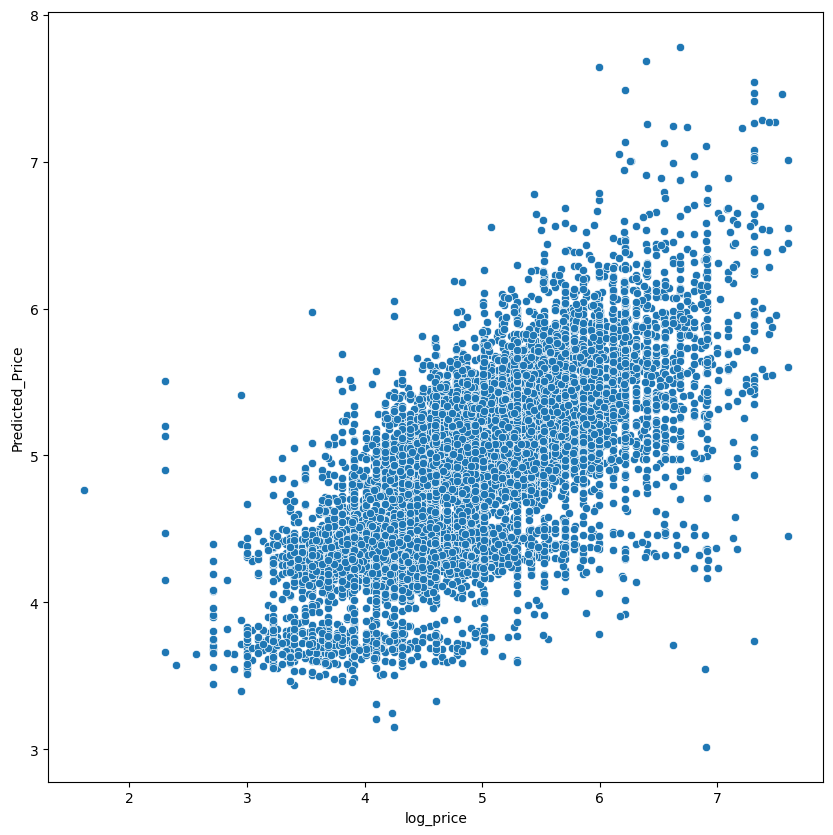

In [347]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="log_price", y ="Predicted_Price",data = Y_test)

In [336]:
import seaborn as sns

In [345]:
import matplotlib.pyplot as plt

In [349]:
Y_test["Error"] = Y_test['log_price'] - Y_test['Predicted_Price']

In [351]:
Y_test

,log_price,Predicted_Price,Error
33694,5.402677,5.412042,-0.009365
8930,4.867534,4.928563,-0.061028
26368,4.174387,3.661472,0.512916
32595,4.779123,4.417802,0.361321
14713,4.787492,5.127093,-0.339601
...,...,...,...
19791,4.094345,3.788343,0.306001
18946,3.912023,4.229165,-0.317142
8845,5.327876,5.078139,0.249737
4512,5.521461,5.372171,0.149290


<Axes: xlabel='Error', ylabel='Predicted_Price'>

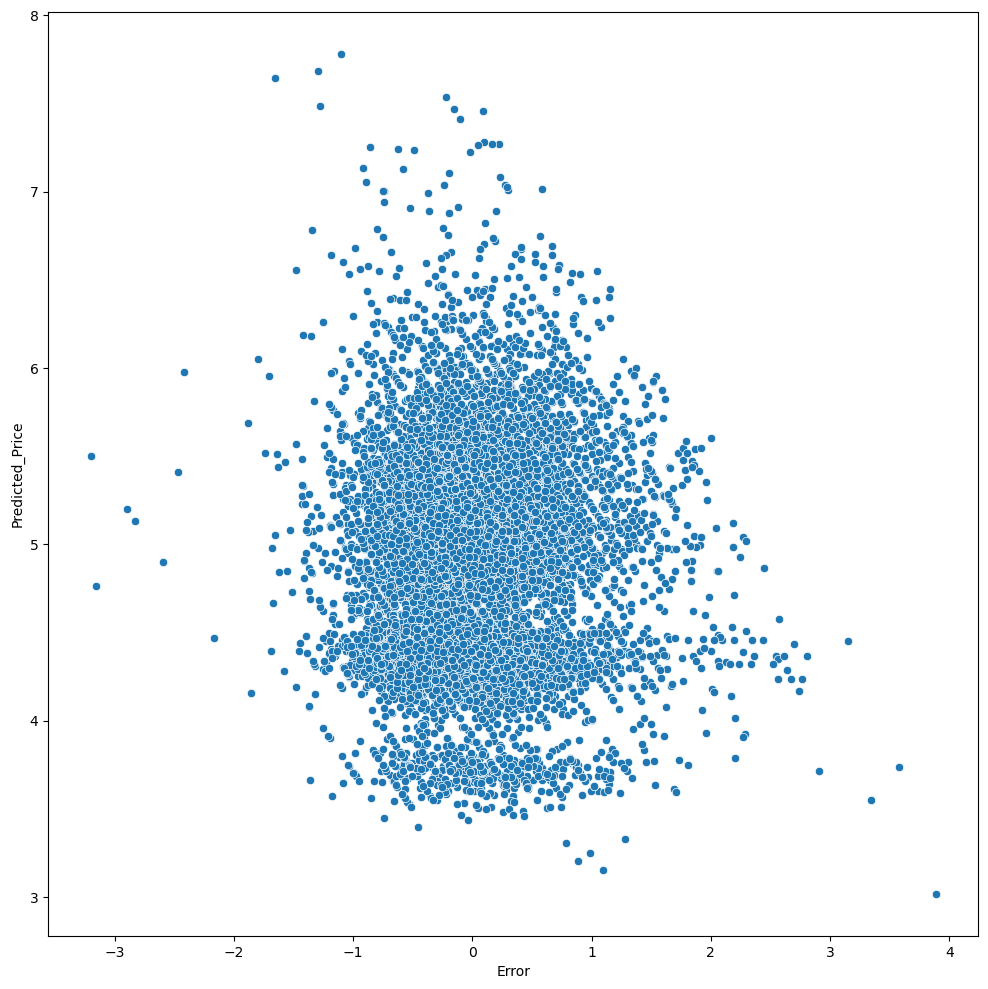

In [353]:
plt.figure(figsize=(12,12))
sns.scatterplot(x ="Error", y = "Predicted_Price", data = Y_test)

In [357]:
import numpy as np